**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Christopher Rebollar-Ramirez
- Licheng Hu
- Lucien Chen
- Steven Shi
- Jasdeep Sandhu

# Research Question

Which factors most significantly affect the pricing of basic economy domestic flights from LAX to major U.S. airports in the month of June, based on analysis of pulled data from Expedia on travel duration, search date, flight date, and arrival airport?

## Background and Prior Work

Nearly a billion people fly in the US alone every year, with the exception of covid. <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Given how prevalent air travel is, we decided to conduct a deeper analysis on airline pricing. We decided to look at LAX specifically given that it is one of the busiest airports in California.

Tons of research has gone into examining different airline pricing strategies and factors that affect the cost of an air fare. In general, airlines, much like other businesses, cater their products toward different demographics of customers. People that travel for work or business are typically more flexible in regards to how they fly as well as less price-sensitve in comparison to leisure travelers.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) By taking advantage of this fact, airline companies are able to effectively segment their products which allows them to maximize their revenues. Airlines also take advantage of dynamic pricing algorithms to match fluctuations in demand. While demand does have some random variation, cyclical factors such as time of day, day of the week or season, play a huge role in the price of an airfare.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) These pricing algorithms are able to capitalize on these flucations in demand and change the price of a ticket accordingly. Other strategies used by airlines include overbooking, poaching, etc.

1. <a name="cite_note-1"></a> [^](#cite_ref-1)Full year 2022 U.S. Airline Traffic Data. Full Year 2022 U.S. Airline Traffic Data | Bureau of Transportation Statistics. (n.d.). https://www.bts.gov/newsroom/full-year-2022-us-airline-traffic-data#:~:text=For%20the%20full%20year%202022,and%20388%20million%20in%202020. 

2. <a name="cite_note-2"></a> [^](#cite_ref-2)Poelt, S. (1970, January 1). Practical pricing and the airline industry. SpringerLink. https://link.springer.com/chapter/10.1057/9780230294776_15 

3. <a name="cite_note-3"></a> [^](#cite_ref-3)The algorithm behind plane ticket prices and how to get the best deal. USC Viterbi School of Engineering. (2019, November 13). https://illumin.usc.edu/the-algorithm-behind-plane-ticket-prices-and-how-to-get-the-best-deal/ 

# Hypothesis


We believe that the factors that most significantly impact the price of a basic economy flight from LAX to other major U.S airports is the difference between the flight date and search date, and total distance/travel duration to desination. From our research, we learned that the price of airline tickets gets higher the closer you book to the flight date since the number of available seats decreases over time. Finally, the further or longer (in terms of time) a plane has to fly, the more costs will be incurred in gasoline and labor costs for staff, so we would expect that further flights are more expensive.

# Data

### Data overview

- Flight Prices
  - Dataset Name: flights_processed.csv
  - Link to the dataset: https://www.kaggle.com/datasets/dilwong/flightprices?resource=download
  - Number of observations: 305,251
  - Number of variables: 17

Our flight dataset has the columns named searchDate (Date format), flightDate (Date format), startingAirport (Date format), destinationAirport (Airport name), travelDuration (PT[HH]H[MM]M), isBasicEconomy (Bool), isNonStop (Bool), baseFare (USD, Float), totalFare (USD, Float), seatsRemaining (int), totalTravelDistance (Miles, Float), segmentsAirlineName (String), segmentsAirlineCode (Int), segmentsDurationInSeconds (Int), segmentsDistance (Miles, Int), and segmentsCabinCode (Int). Our most important variables would be baseFare and totalFare as we analyze which variables effect them. This will make the baseFare and totalFare variables our dependent variables. This will help us determine which factors significantly affect the pricing of basic economy domestic flights from LAX to major U.S. cities. To make the data more useable and cleaner, we will eliminate flights with missing information, convert any strings to numeric if necessary, and have consistent data on every flight in the dataset. We have also limited our dataset to June, as that is typically when school is finished so many people are travelling. This has reduced our dataset by nearly half, making it easier to modify. We can potentially apply linear regression to see what affects our dependent variable.

### Data Wrangling

In [ ]:
import pandas as pd

#original dataset was 31 gb, too large to upload or process, so this was done on kaggle and split into chunks
chunk_size = 10000  # Size of each chunk
first_chunk = True

#this processing was done on kaggle to utilize their more powerful processing power, the original dataset was 31gb, which is too large to upload or processs
chunks = pd.read_csv('itineraries.csv', chunksize=chunk_size)

results = []

for chunk in chunks:
    #only consider flights from LAX
    chunk = chunk[chunk['startingAirport'] == 'LAX']
    #only consider June flights
    chunk = chunk[chunk['flightDate'].str.contains('-06-')]
    #only consider nonstop flights
    chunk = chunk[chunk['isNonStop'] == True]
    #drop unnecessary columns
    chunk = chunk.drop(['legId', 'fareBasisCode','elapsedDays', 'isRefundable',
                       'segmentsDepartureTimeEpochSeconds',
                       'segmentsDepartureTimeRaw','segmentsArrivalTimeEpochSeconds',
                       'segmentsArrivalTimeRaw','segmentsArrivalAirportCode','segmentsDepartureAirportCode'
                       ,'segmentsEquipmentDescription'], axis=1)
    processed_chunk = chunk

    #add to our new processed dataset
    if first_chunk:
        processed_chunk.to_csv('processed_file.csv', mode='w', index=False)
        first_chunk = False
    else:
        processed_chunk.to_csv('processed_file.csv', mode='a', index=False, header=False)
        break

To wrangle our data, we only want to consider the flights from LAX, in June, nonstop flights, and come unnecessary columns. When working on analyzing the data, we first want to eliminate the data that is useless when finding which factors most significantly affect the pricing of basic economy domestic flights from LAX to major U.S. airports in the month of June.

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

In [4]:
import seaborn as sns
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [5]:
df=pd.read_csv("flights_processed.csv")
df['search_day_before_flights']=(pd.to_datetime(df['flightDate'])-pd.to_datetime(df['searchDate'])).dt.days
df['days']=df['flightDate'].apply(lambda x: pd.to_datetime(x).strftime('%A'))
df['flightDate'] = pd.to_datetime(df['flightDate']).dt.date
df['searchDate'] = pd.to_datetime(df['searchDate']).dt.date
df=df.drop(columns=['isNonStop','travelDuration','segmentsDistance'])

In [6]:
df.shape

(305250, 15)

In [7]:
df.dtypes

searchDate                    object
flightDate                    object
startingAirport               object
destinationAirport            object
isBasicEconomy                  bool
baseFare                     float64
totalFare                    float64
seatsRemaining                 int64
totalTravelDistance          float64
segmentsAirlineName           object
segmentsAirlineCode           object
segmentsDurationInSeconds      int64
segmentsCabinCode             object
search_day_before_flights      int64
days                          object
dtype: object

Our dataset contains 305250 data and 15 varibles. We have __numeric variables__(baseFare, totalFare, seatsRemaining, totalTravelDistance, segmentsDurationInSeconds, segmentsDistance, search_day_before_flights, duration_seconds), __categorical variable__(searchDate, flightDate, startingAirport, destinationAirport, travelDuration, segmentsAirlineName, segmentsAirlineCode, segmentsCabinCode, days) and __boolean varible__ (isBasicEconomy)

In [8]:
df.describe()

,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDurationInSeconds,search_day_before_flights
count,305250.000000,305250.000000,305250.000000,285836.000000,305250.000000,305250.000000
mean,395.966037,441.834246,6.095574,1706.165735,14484.683440,26.939538
std,286.032648,306.290018,2.765178,815.630684,5553.747086,16.934928
min,2.000000,29.590000,0.000000,338.000000,4320.000000,1.000000
25%,231.630000,268.600000,4.000000,848.000000,9180.000000,12.000000
50%,372.000000,414.600000,7.000000,1943.000000,15840.000000,25.000000
75%,478.130000,528.590000,8.000000,2458.000000,19620.000000,42.000000
max,4435.350000,4782.600000,10.000000,2606.000000,20820.000000,60.000000


In [9]:
df.isna().mean()

searchDate                   0.0000
flightDate                   0.0000
startingAirport              0.0000
destinationAirport           0.0000
isBasicEconomy               0.0000
baseFare                     0.0000
totalFare                    0.0000
seatsRemaining               0.0000
totalTravelDistance          0.0636
segmentsAirlineName          0.0000
segmentsAirlineCode          0.0000
segmentsDurationInSeconds    0.0000
segmentsCabinCode            0.0000
search_day_before_flights    0.0000
days                         0.0000
dtype: float64

In [10]:
missing_date = df[df.isna().any(axis=1)]
missing_date['destinationAirport'].value_counts()

DFW    6412
ORD    4164
DTW    2686
ATL    1684
OAK    1421
PHL     960
EWR     641
JFK     510
SFO     242
DEN     236
BOS     161
CLT     112
MIA      80
IAD      65
LGA      40
Name: destinationAirport, dtype: int64

Since the destinationAirport has no missing value and our startingAirport are all from LAX and flights has same startingAirport and destinationAirport should have similar travel distance, we could estimated the missing value in totalTravelDistance by doing mean imputation from different destinationAirport. Moreover, all the flights with destinationAirport as LGA has missing values in totalTravelDistance. However, LGA ariport are located in New York City where close to JFK, we could use mean totalTravelDistance from LAX to JKF to imput the missing totalTravelDistance value with destinationAirport of LGA.

In [11]:
mean_distance_jfk=df[df['destinationAirport'] == 'JFK']['totalTravelDistance'].mean()
df.loc[(df['destinationAirport'] == 'LGA') & (df['totalTravelDistance'].isnull()), 'totalTravelDistance'] = mean_distance_jfk
mean_distances_by_destinationAirport= df.groupby('destinationAirport')['totalTravelDistance'].transform('mean')
df['totalTravelDistance'] = df['totalTravelDistance'].fillna(mean_distances_by_destinationAirport)

In [12]:
df.isna().mean(), df.shape

(searchDate                   0.0
 flightDate                   0.0
 startingAirport              0.0
 destinationAirport           0.0
 isBasicEconomy               0.0
 baseFare                     0.0
 totalFare                    0.0
 seatsRemaining               0.0
 totalTravelDistance          0.0
 segmentsAirlineName          0.0
 segmentsAirlineCode          0.0
 segmentsDurationInSeconds    0.0
 segmentsCabinCode            0.0
 search_day_before_flights    0.0
 days                         0.0
 dtype: float64,
 (305250, 15))

### Next, let's take a look at the distribution of flight price

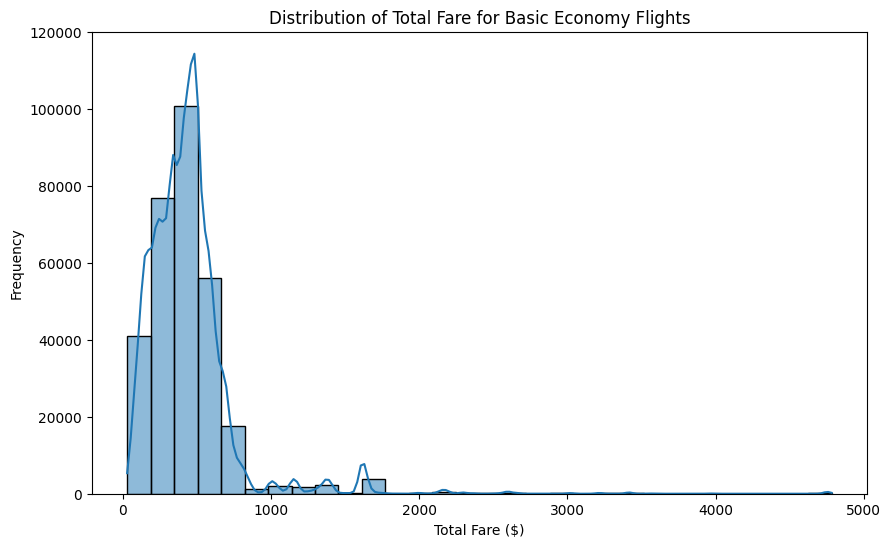

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totalFare'], bins=30, kde=True)
plt.title('Distribution of Total Fare for Basic Economy Flights')
plt.xlabel('Total Fare ($)')
plt.ylabel('Frequency')
plt.show()

This histogram shows a right-skewed distribution, indicating that most basic economy fares are concentrated in the lower price range, with fewer flights having higher prices.

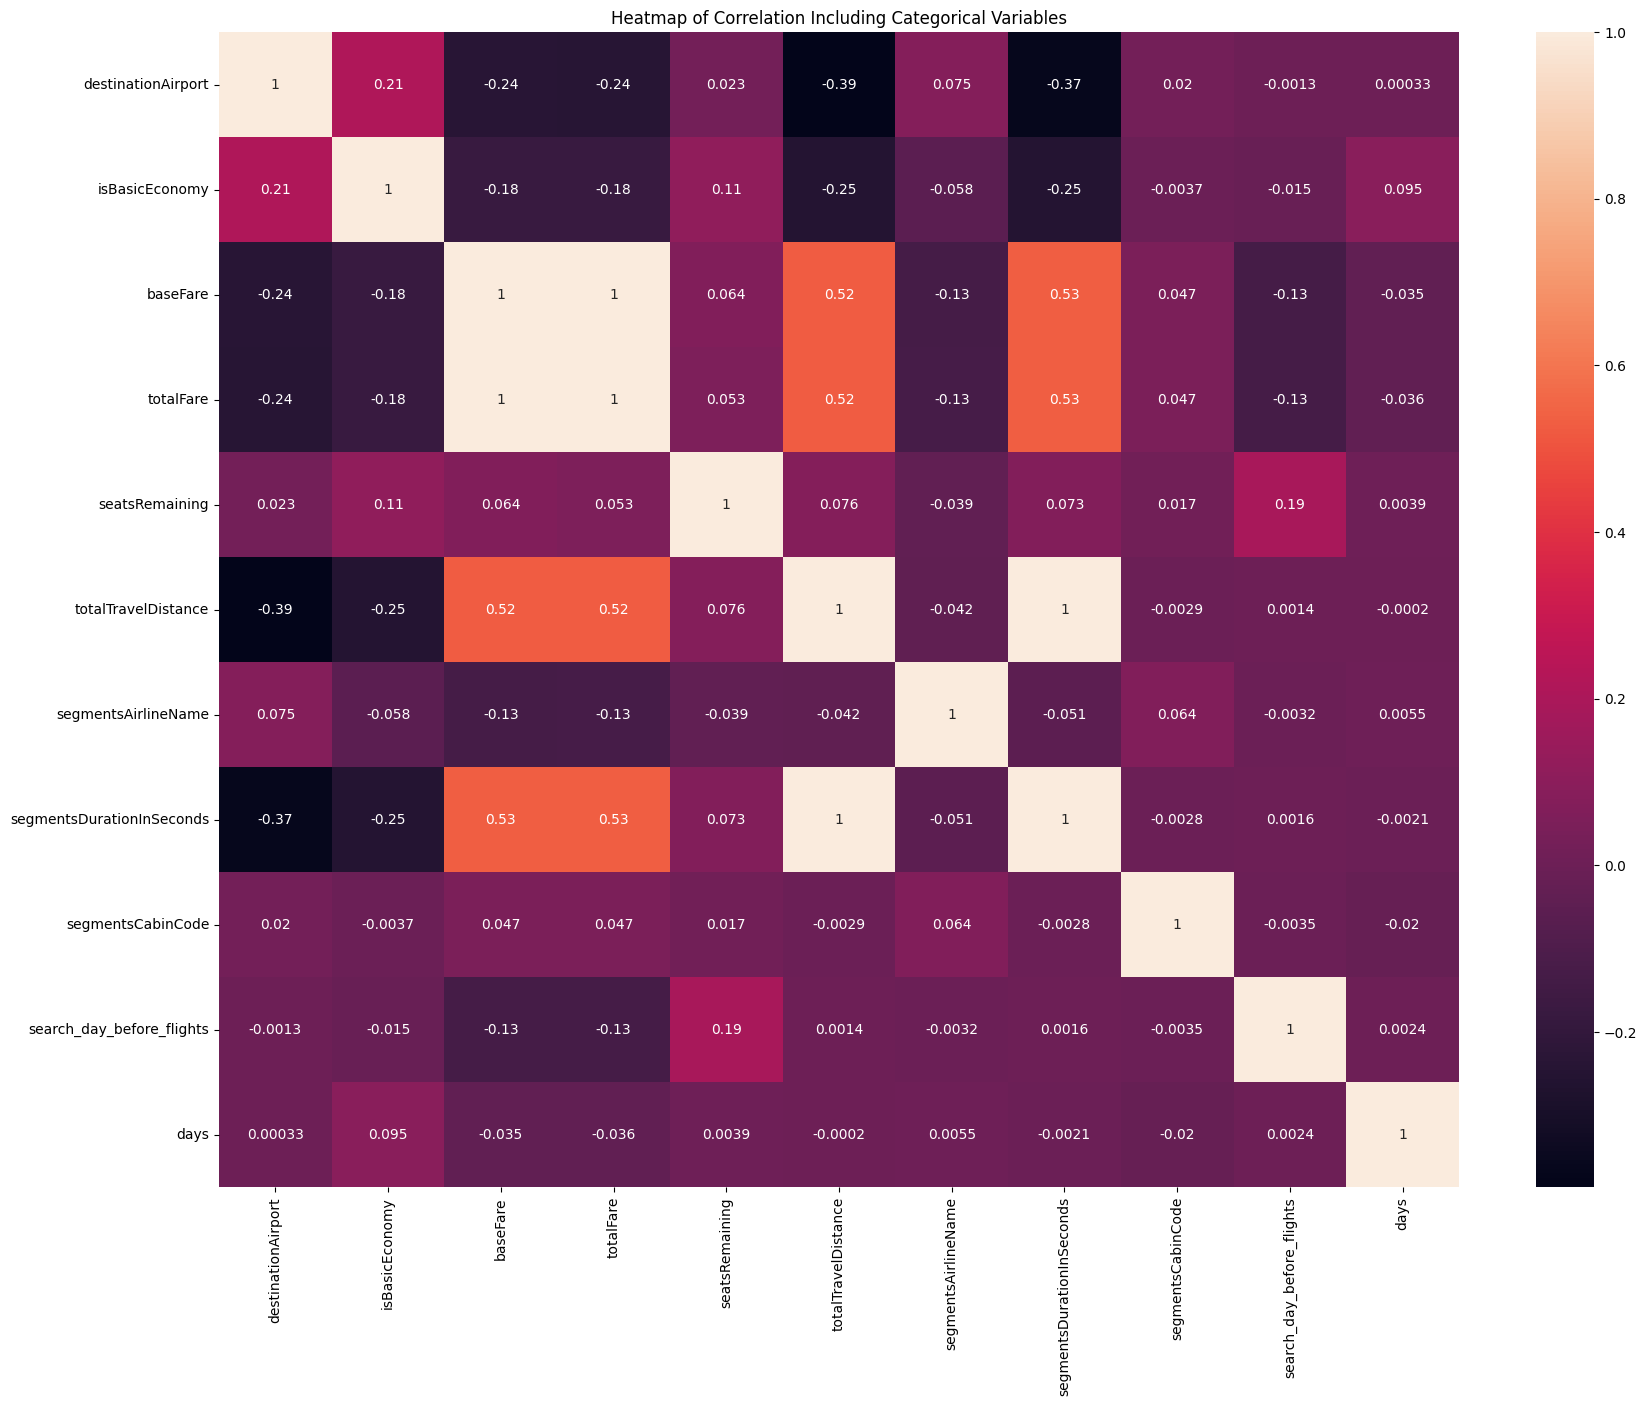

In [14]:
encoded_df=df.copy()
cols_to_encode = ['destinationAirport', 'segmentsAirlineName', 'segmentsCabinCode',"days"]
encoder = OrdinalEncoder()
encoded_df[cols_to_encode] = encoder.fit_transform(encoded_df[cols_to_encode])
correlation_matrix_all = encoded_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_all, annot=True)
plt.title('Heatmap of Correlation Including Categorical Variables')
plt.show()

We used ordinal encoding to encoded catgorical varibles and ploted varible correlation heatmap for our data. For this heatmap, we can see flight duration and flight distance have strong corrlations with our flight price. 

### Lets take a look at the relationship between total flight price with light duration and flight distance.

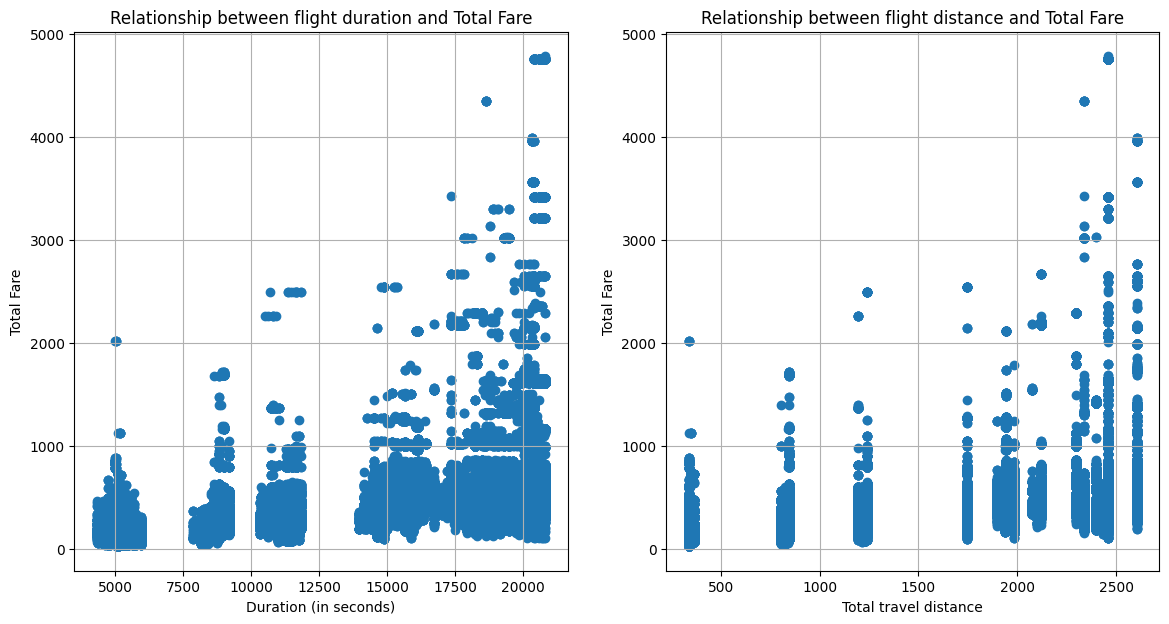

In [15]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(df['segmentsDurationInSeconds'], df['totalFare'])
plt.title('Relationship between flight duration and Total Fare')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Total Fare')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['totalTravelDistance'], df['totalFare'])
plt.title('Relationship between flight distance and Total Fare')
plt.xlabel('Total travel distance')
plt.ylabel('Total Fare')
plt.grid(True)

There appears to be some form of positive correlation in both plots, where both longer travel distance and longer durations tend to be associated with higher total fares. However there are variations that suggest other factors might be influencing the fare besides just the travel duration and travel distance. 


### Lets look at some other varibles 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'business'),
  Text(1, 0, 'coach'),
  Text(2, 0, 'first'),
  Text(3, 0, 'premium coach')])

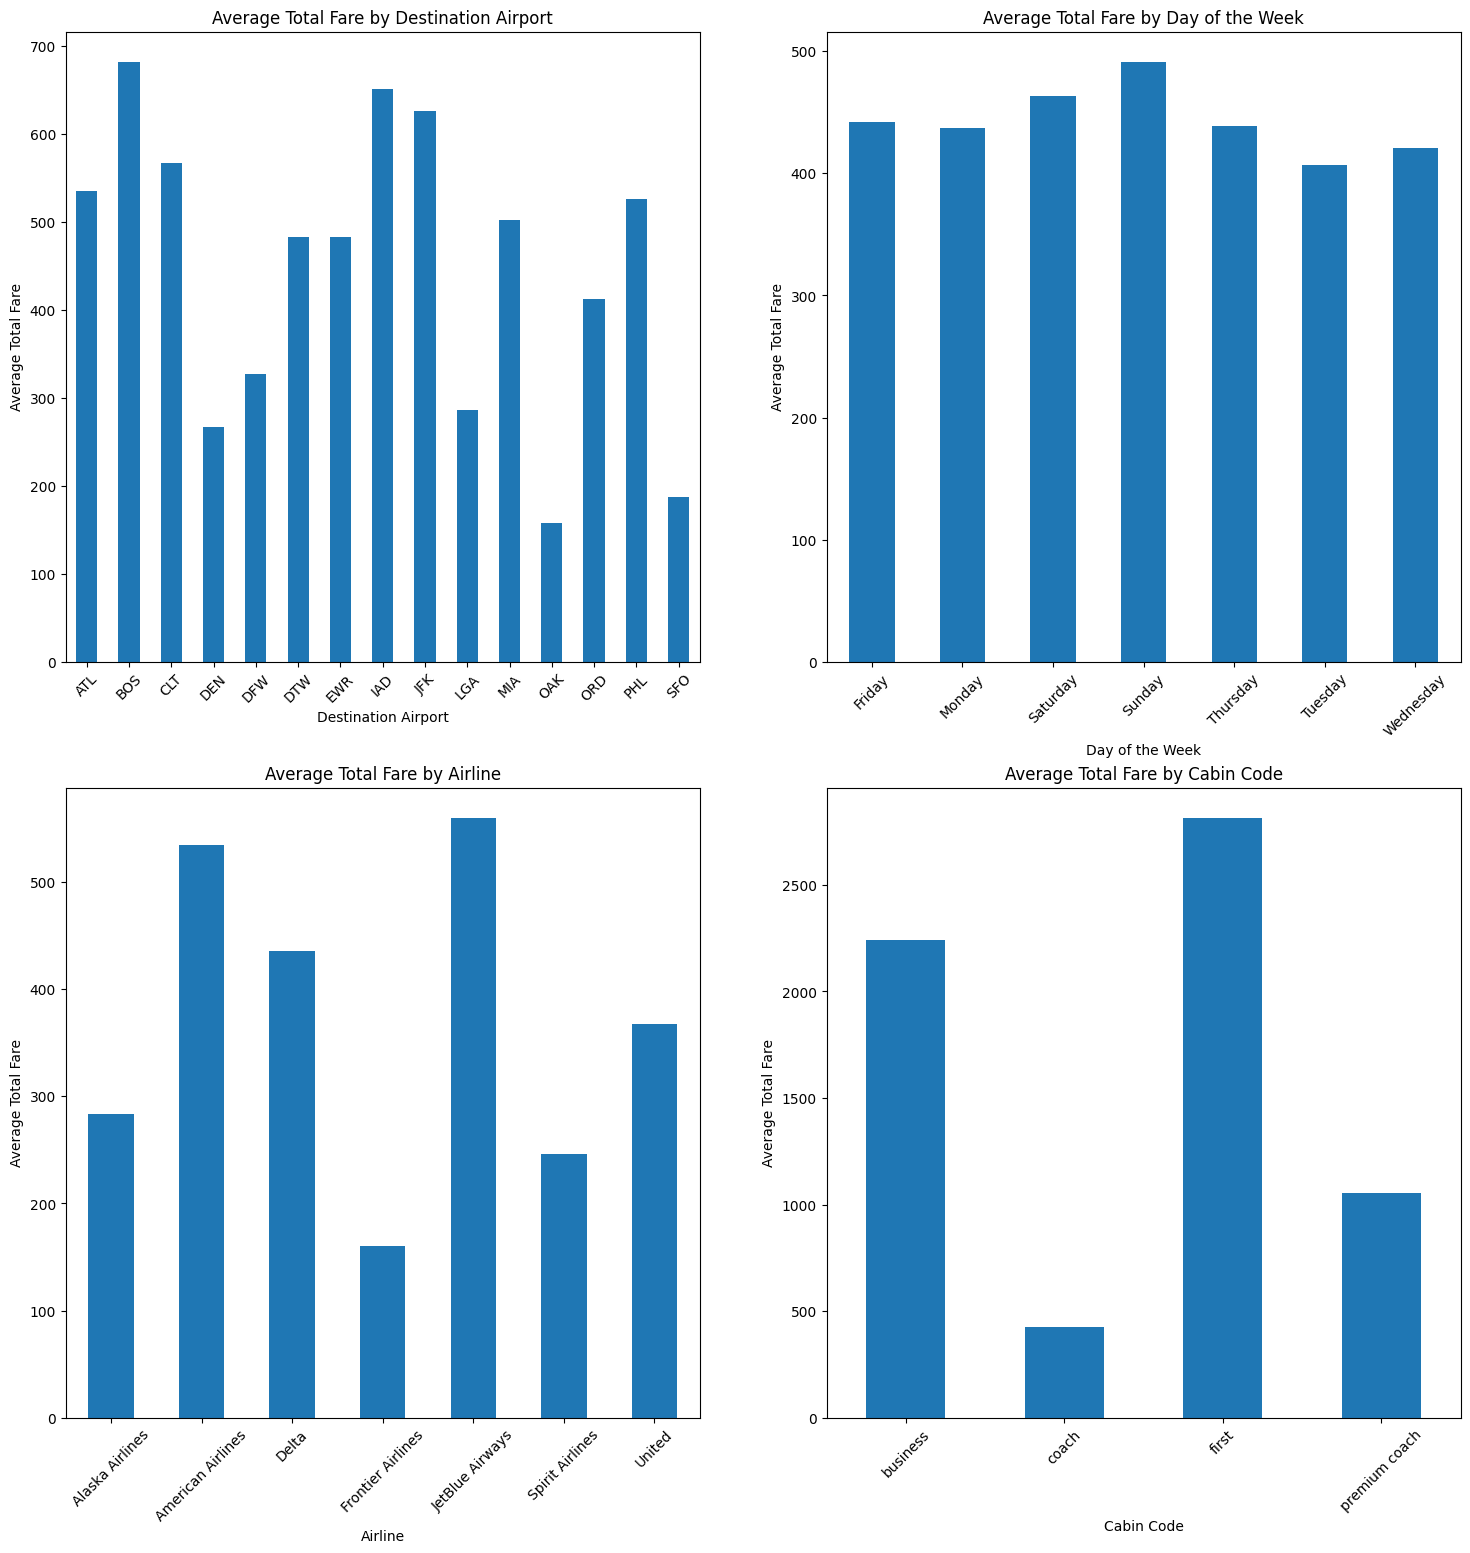

In [16]:
plt.figure(figsize=(18, 18))
plt.subplot(2, 2, 1)
df.groupby('destinationAirport')['totalFare'].mean().plot(kind='bar')
plt.title('Average Total Fare by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
df.groupby('days')['totalFare'].mean().plot(kind='bar')
plt.title('Average Total Fare by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
df.groupby('segmentsAirlineName')['totalFare'].mean().plot(kind='bar')
plt.title('Average Total Fare by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
df.groupby('segmentsCabinCode')['totalFare'].mean().plot(kind='bar')
plt.title('Average Total Fare by Cabin Code')
plt.xlabel('Cabin Code')
plt.ylabel('Average Total Fare')
plt.xticks(rotation=45)

Above four graphs showed average flight price in different categories within different varibles. For destination airport, we could see flights to BOS, IAD, and JFK tend to have higher price. This may due to BOS, IAD, and JFK are futher from LAX and these destination are more popular, since some destination like PHL and MIA are also far from LAX but the average flight prices are lower than BOS, IAD, and JFK. Destination airport also correlated with total distance and duration of the flight. The flights with destination airport that far from LAX are tend to have longer flight duration and distance. For Averge Total fare versus Day of week plot, we can see there is no significant difference for averge total fare across the week. The flights price are slightly higher in weekends compare to weekdays. Flight price also varies by airlines(American Airlines and JetBlue tend to have higher price) and cabin code(Business and first class are more expensive).      

### Lastly, lets see how search date and flight date influnce the flight price

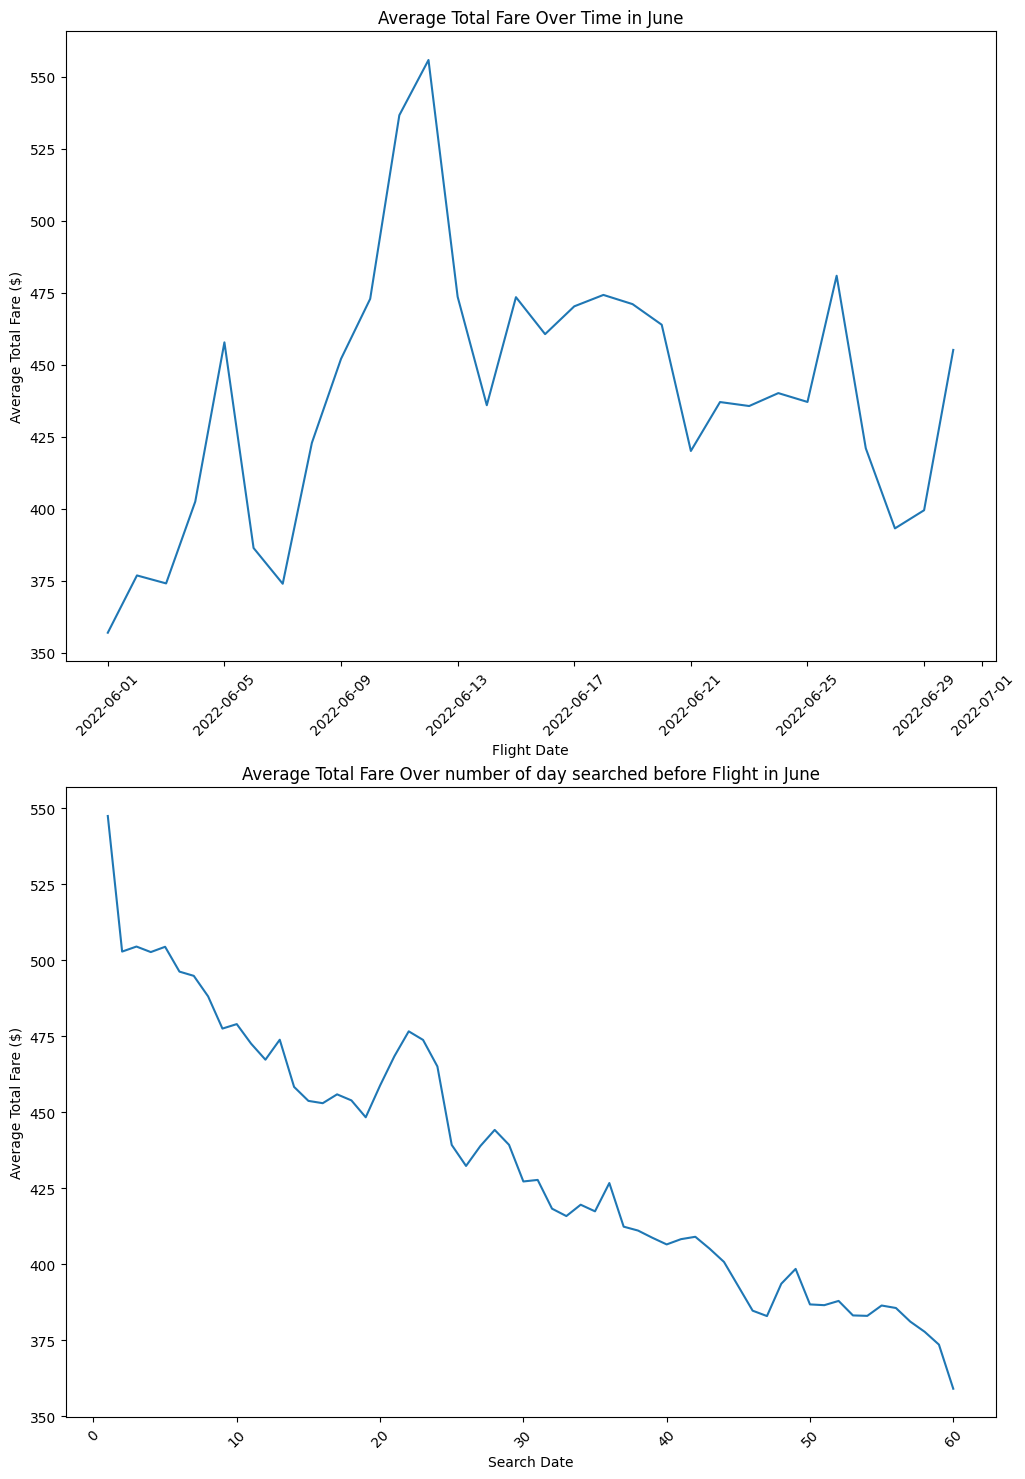

In [17]:
plt.figure(figsize=(12, 18))
plt.subplot(2, 1, 1)
avg_fare_by_date = df.groupby('flightDate')['totalFare'].mean().reset_index()
sns.lineplot(data=avg_fare_by_date, x='flightDate', y='totalFare')
plt.title('Average Total Fare Over Time in June')
plt.xlabel('Flight Date')
plt.xticks(rotation=45)
plt.ylabel('Average Total Fare ($)')

plt.subplot(2, 1, 2)
avg_fare_by_date = df.groupby('search_day_before_flights')['totalFare'].mean().reset_index()
sns.lineplot(data=avg_fare_by_date, x='search_day_before_flights', y='totalFare')
plt.title('Average Total Fare Over number of day searched before Flight in June')
plt.xlabel('Search Date')
plt.xticks(rotation=45)
plt.ylabel('Average Total Fare ($)')
plt.show()

From the plot of average total fare over time in June, we can see flights in June 9th to June 13th have higher price than other date. This may because June 11th and June 12th are weekends and also indicated that there are more people planed travel during this period. From the plot of average total fare over number of day Searched before Flight, we can see that flight price tend to be higher if the search date is closer to the flight date. 

# Analysis

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [40]:
data=df.copy()
cols_to_encode = ['destinationAirport', 'segmentsAirlineName', 'segmentsCabinCode',"days", "flightDate"]
encoder = OrdinalEncoder()
data[cols_to_encode] = encoder.fit_transform(data[cols_to_encode])
data=data.drop(columns=['segmentsAirlineCode','baseFare','isBasicEconomy','startingAirport','searchDate'])
data.head()

,flightDate,destinationAirport,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode,search_day_before_flights,days
0,0.0,0.0,198.59,0,1936.100482,5.0,15720,1.0,45,6.0
1,0.0,0.0,198.59,0,1936.100482,5.0,15780,1.0,45,6.0
2,0.0,0.0,323.60,9,1943.000000,2.0,15000,1.0,45,6.0
3,0.0,0.0,323.60,6,1943.000000,2.0,15360,1.0,45,6.0
4,0.0,0.0,323.60,2,1943.000000,2.0,15540,1.0,45,6.0


## Baseline

In [41]:
X = data.drop(columns=['totalFare'])
y = data['totalFare']

In [47]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
lr_model = LinearRegression().fit(X_train, y_train)

In [53]:
y_pred= lr_model.predict(X_test)

In [54]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 131.99965129989272
Mean Square Error: 62740.64299461723
Root Mean Square Error: 250.48082360655323


## Final Model

In [72]:
from sklearn import ensemble

In [73]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [74]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [76]:
y_pred= reg.predict(X_test)

In [78]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 96.74644101332628
Mean Square Error: 27434.502315004323
Root Mean Square Error: 165.63363883886728


# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |